In [2]:
import pandas as pd

df = pd.read_csv("data\\creditcard.csv")
print(df.head())
print(df.info())

df['Class'].value_counts(normalize=True)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
x[['Time', 'Amount']] = scaler.fit_transform(x[['Time', 'Amount']])

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight="balanced")
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1141        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962



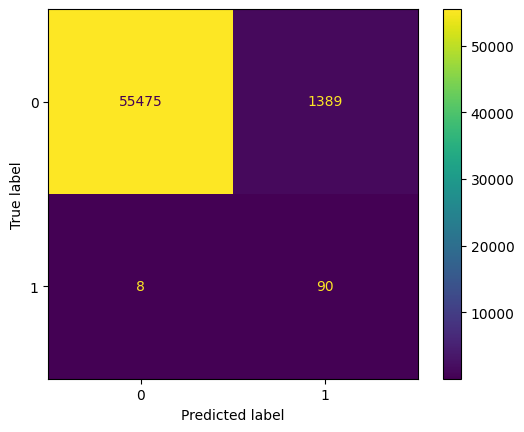

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9605    0.7449    0.8391        98

    accuracy                         0.9995     56962
   macro avg     0.9800    0.8724    0.9194     56962
weighted avg     0.9995    0.9995    0.9995     56962



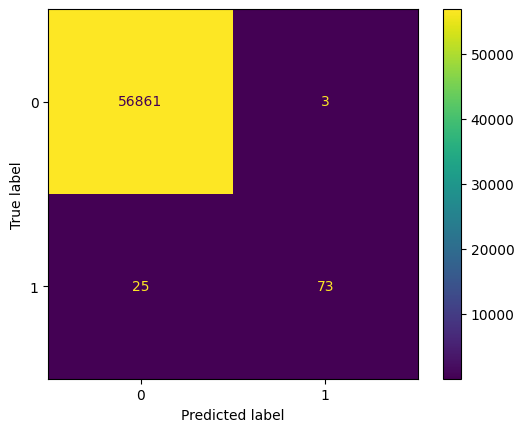

In [7]:
print(classification_report(y_test, y_pred_rf, digits=4))

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()

In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [ ]:
lr_res = LogisticRegression(max_iter=1000, class_weight="balanced")
lr_res.fit(x_train_res, y_train_res)
y_pred_res = lr_res.predict(x_test)

              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962



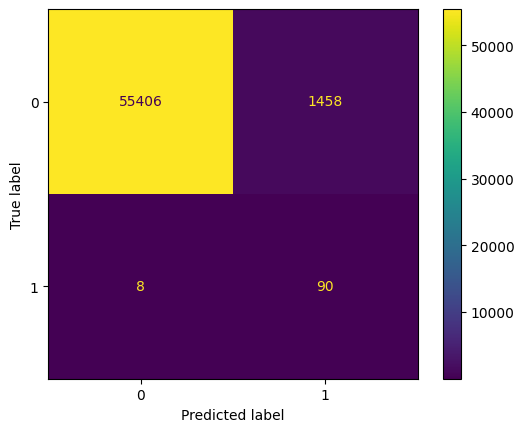

In [10]:
print(classification_report(y_test, y_pred_res, digits=4))

cm_res = confusion_matrix(y_test, y_pred_res)
disp_res = ConfusionMatrixDisplay(confusion_matrix=cm_res)
disp_res.plot()

In [11]:
rf_res = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_res.fit(x_train_res, y_train_res)
y_pred_rf_res = rf_res.predict(x_test)

              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8454    0.8367    0.8410        98

    accuracy                         0.9995     56962
   macro avg     0.9225    0.9182    0.9204     56962
weighted avg     0.9995    0.9995    0.9995     56962



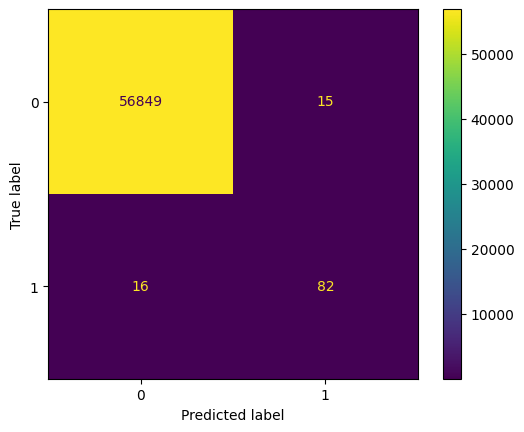

In [12]:
print(classification_report(y_test, y_pred_rf_res, digits=4))

cm_rf_res = confusion_matrix(y_test, y_pred_rf_res)
disp_rf_res = ConfusionMatrixDisplay(confusion_matrix=cm_rf_res)
disp_rf_res.plot()

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = []

def evaluate_model(name, y_true, y_pred):
    results.append({
        "Model": name,
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    })

evaluate_model("LogReg", y_test, y_pred)
evaluate_model("RandomForest", y_test, y_pred_rf)
evaluate_model("LogReg + SMOTE", y_test, y_pred_res)
evaluate_model("RF + SMOTE", y_test, y_pred_rf_res)

df_results = pd.DataFrame(results)
df_results

,Model,Precision,Recall,F1
0,LogReg,0.060852,0.918367,0.114141
1,RandomForest,0.960526,0.744898,0.839080
2,LogReg + SMOTE,0.058140,0.918367,0.109356
3,RF + SMOTE,0.845361,0.836735,0.841026


In [18]:
best_model = df_results.loc[df_results['Recall'].idxmax()]
best_model

Model          LogReg
Precision    0.060852
Recall       0.918367
F1           0.114141
Name: 0, dtype: object